# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | songjianghe
Processing Record 2 of Set 1 | sarkhej
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | island harbour
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | ujae
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | tuy hoa
Processing Record 18 of Set 1 | umluj
Processing Record 19 of Set 1 | port augusta
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | whitehorse
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,songjianghe,42.1859,127.4790,19.64,17,17,3.08,CN,1683783669
1,sarkhej,22.9833,72.5000,38.07,22,0,4.12,IN,1683783669
2,iqaluit,63.7506,-68.5145,-8.15,79,0,7.72,CA,1683783669
3,margaret river,-33.9500,115.0667,15.99,53,99,2.24,AU,1683783670
4,punta arenas,-53.1500,-70.9167,6.06,87,75,4.63,CL,1683783384


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,songjianghe,42.1859,127.4790,19.64,17,17,3.08,CN,1683783669
1,sarkhej,22.9833,72.5000,38.07,22,0,4.12,IN,1683783669
2,iqaluit,63.7506,-68.5145,-8.15,79,0,7.72,CA,1683783669
3,margaret river,-33.9500,115.0667,15.99,53,99,2.24,AU,1683783670
4,punta arenas,-53.1500,-70.9167,6.06,87,75,4.63,CL,1683783384


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

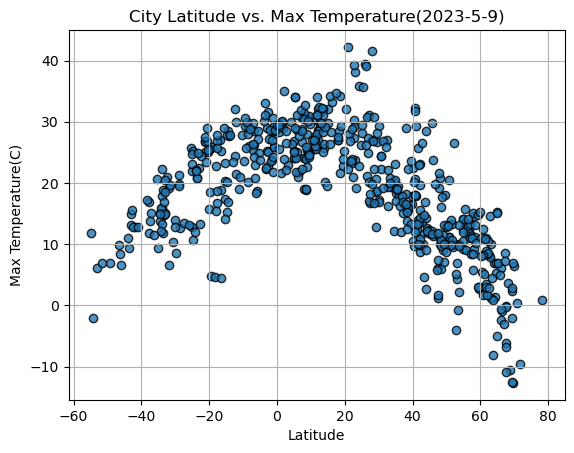

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o",
            edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude vs. Max Temperature(2023-5-9)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

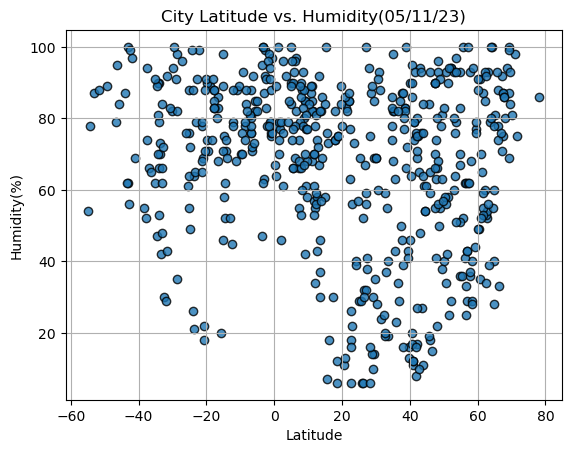

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, linewidth=1, marker="o",
            edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

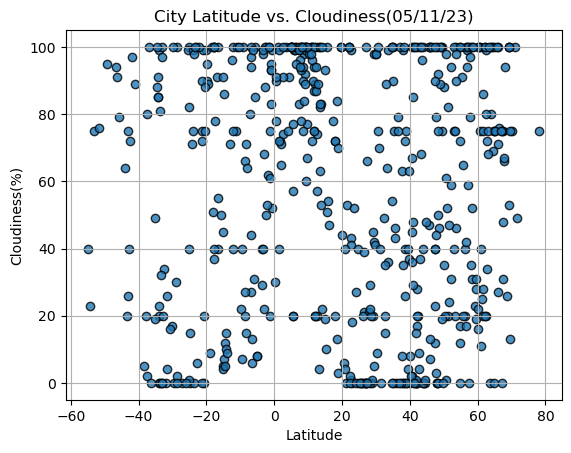

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, linewidth=1, marker="o",
            edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

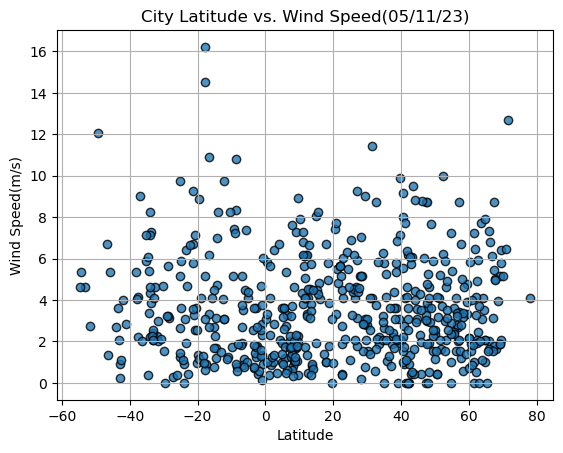

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, linewidth=1, marker="o",
            edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_lin_reg(x_values,y_values,title,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,songjianghe,42.1859,127.4790,19.64,17,17,3.08,CN,1683783669
1,sarkhej,22.9833,72.5000,38.07,22,0,4.12,IN,1683783669
2,iqaluit,63.7506,-68.5145,-8.15,79,0,7.72,CA,1683783669
9,bilibino,68.0546,166.4372,3.74,80,94,1.62,RU,1683783672
10,island harbour,50.7240,-1.2758,11.10,93,61,0.45,GB,1683783384


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,margaret river,-33.9500,115.0667,15.99,53,99,2.24,AU,1683783670
4,punta arenas,-53.1500,-70.9167,6.06,87,75,4.63,CL,1683783384
5,port-aux-francais,-49.3500,70.2167,6.86,89,95,12.07,TF,1683783670
6,dunedin,-45.8742,170.5036,6.56,84,79,5.36,NZ,1683783644
7,puerto natales,-51.7236,-72.4875,6.93,88,76,2.73,CL,1683783671


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6861182337699288


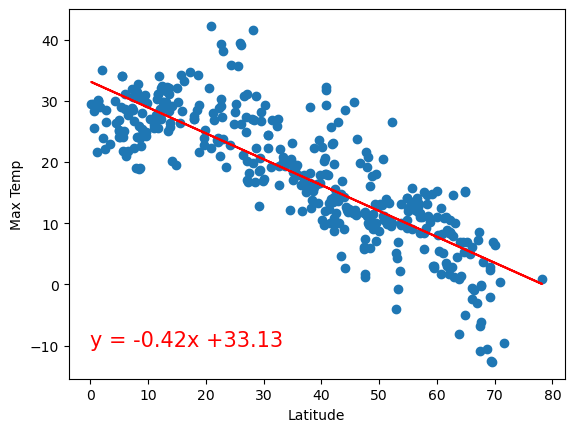

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_lin_reg(x_values,y_values, "Max Temp", (0,-10))

The r-value is: 0.5481210224595005


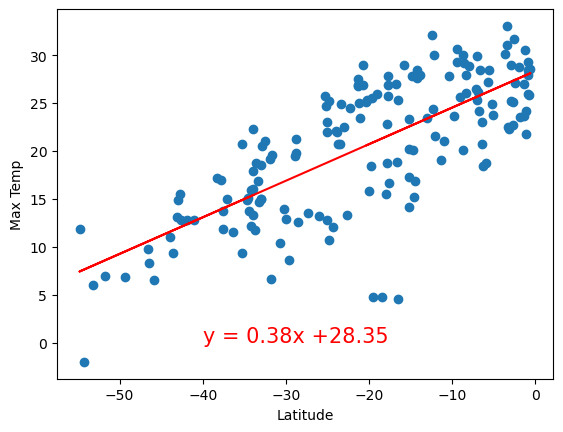

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_lin_reg(x_values,y_values, "Max Temp", (-40,0))

**Discussion about the linear relationship:** The linear relationship is stronger but still to weak to form a strong correlation. In the southern hemisphere it is even more scattered to draw any conclusions.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0005777667072245323


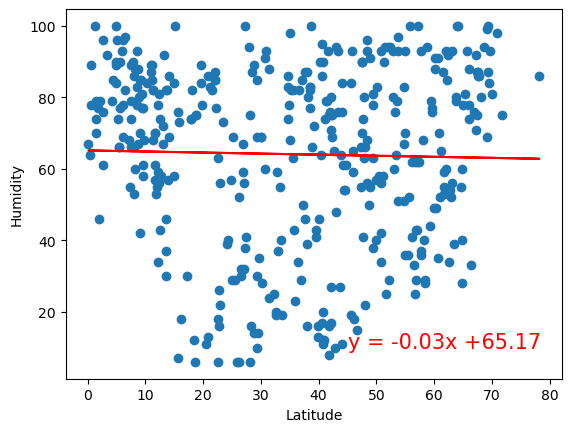

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_lin_reg(x_values,y_values, "Humidity", (45,10))

The r-value is: 0.02279643810441395


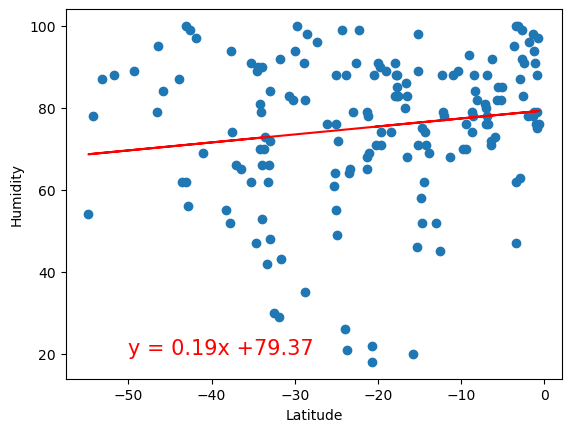

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_lin_reg(x_values,y_values, "Humidity", (-50,20))

**Discussion about the linear relationship:** Results for both of these linear regression lines are to scattered to draw any correlation between either the north and south hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02336201441464517


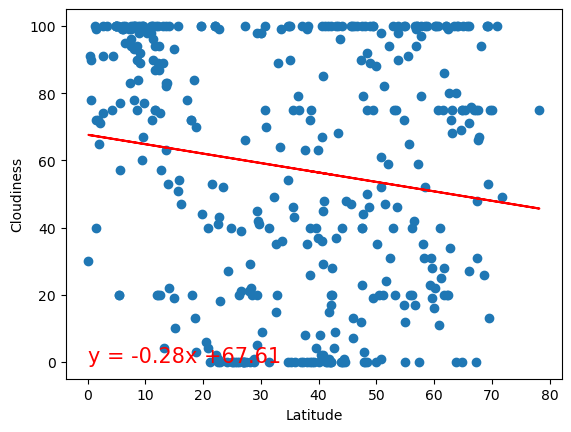

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_lin_reg(x_values,y_values, "Cloudiness", (0,0))

The r-value is: 0.012507398876453227


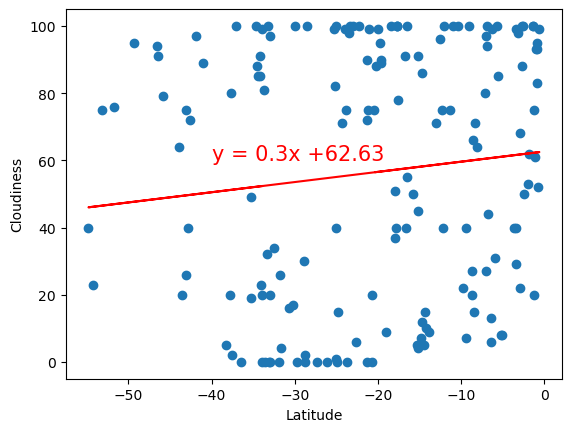

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_lin_reg(x_values,y_values, "Cloudiness", (-40,60))

**Discussion about the linear relationship:** The cloudiness linear relationship is not strong in either north or south data is scattered heavily on both.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002324691862737522


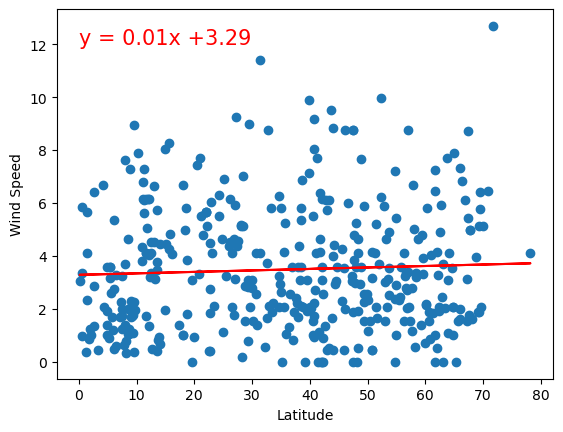

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_lin_reg(x_values,y_values, "Wind Speed", (-0,12))

The r-value is: 0.018094945127627455


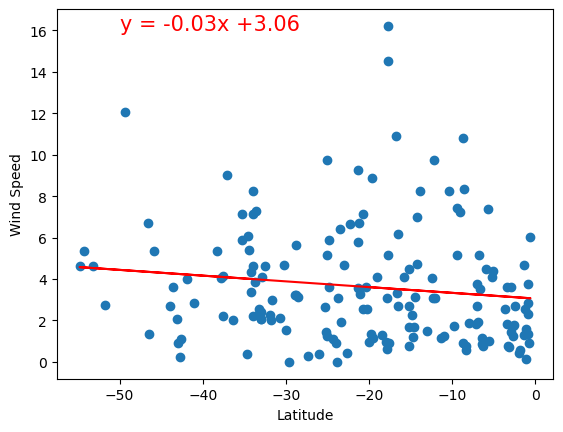

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_lin_reg(x_values,y_values, "Wind Speed", (-50,16))

**Discussion about the linear relationship:** Lastly just as previous linear relationships the wind speed depending on latitude in north or south is not a strong line due to the data being so dispersed in the graph.